In [31]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
import warnings

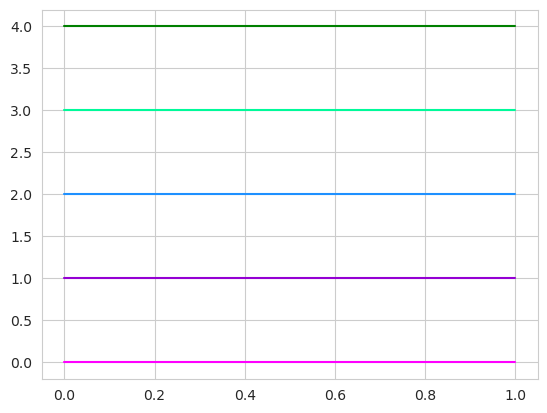

In [32]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [33]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Heterogeneity/')

In [34]:
rahmioglu_b38 = pd.read_table('Rahmioglu_loci_b38.bed', index_col=3, header=None)
rahmioglu = pd.read_csv('Rahmioglu_processed_signals.csv', index_col='Lead SNP').rename(columns={'Unnamed: 0': 'Signal'})
rahmioglu[['START', 'STOP']] = rahmioglu_b38.loc[rahmioglu.index.intersection(rahmioglu_b38.index), [1, 2]]
rahmioglu['Position (b38)'] = rahmioglu[['START', 'STOP']].mean(axis=1)
rahmioglu = rahmioglu[rahmioglu['Chr'] != 'X']
rahmioglu['Chr'] = rahmioglu['Chr'].astype(int)
rahmioglu

,Signal,Chr,Position (hg19),Overall_OR,Overall_P,EUR_RAF,EUR_OR,EUR_P,JPT_RAF,JPT_OR,...,Stage34_OR_CI,Stage34_BETA,Stage12_OR_CI,Stage12_BETA,Infertility_OR_CI,Infertility_BETA,Risk_Allele,START,STOP,Position (b38)
Lead SNP,,,,,,,,,,,,,,,,,,,,,
rs10917151,WNT4/1p36.12,1,22422721.0,1.14,5.08x10-44,0.16,1.14,3.64x10-41,0.57,1.27,...,(1.16-1.31),0.207014,(1.08-1.24),0.148420,(1.13-1.31),0.190620,A,22046228.0,22146228.0,22096228.0
rs12030576,NGF/1p13.2,1,115817221.0,1.06,3.34x10-13,0.65,1.06,1.91x10-13,0.41,0.99,...,(0.97-1.08),0.029559,(1.02-1.15),0.086178,(0.98-1.11),0.039221,G,115224600.0,115324600.0,115274600.0
rs2040445,SLC19A2/1q24.2,1,169216412.0,1.17,1.40x10-10,0.97,1.17,1.96x10-10,NaN,NaN,...,(1.28-1.83),0.425268,(0.84-1.24),0.019803,(1.07-1.55),0.254642,G,169197174.0,169297174.0,169247174.0
rs2421985,DNM3/1q24.3,1,172099136.0,1.05,6.73x10-14,0.49,1.05,1.72x10-12,0.77,1.28,...,(1.04-1.14),0.086178,(0.97-1.07),0.019803,(0.96-1.07),0.009950,C,172079996.0,172179996.0,172129996.0
rs11674184,GREB1/2p25.1,2,11721535.0,1.08,3.16x10-26,0.61,1.08,5.91x10-24,0.54,1.25,...,(1.10-1.22),0.148420,(1.02-1.14),0.067659,(0.99-1.12),0.048790,T,11531409.0,11631409.0,11581409.0
rs1430787,ETAA1/2p14,2,67868498.0,1.04,9.65x10-9,0.31,1.04,4.56x10-8,0.22,1.17,...,(1.05-1.16),0.095310,(1.02-1.14),0.076961,(1.01-1.14),0.067659,A,67591366.0,67691366.0,67641366.0
rs6435157,BMPR2/2q33.1,2,203441224.0,1.05,4.97x10-8,0.77,1.05,1.12x10-7,0.97,1.42,...,(1.06-1.19),0.122218,(1.01-1.15),0.076961,(1.07-1.22),0.131028,T,202526501.0,202626501.0,202576501.0
rs1352889,BSN/3p21.31,3,49652148.0,1.05,2.79x10-8,0.17,1.05,2.79x10-8,NaN,NaN,...,(0.95-1.08),0.019803,(0.98-1.13),0.048790,(0.98-1.13),0.048790,T,49564715.0,49664715.0,49614715.0
rs1903068,KDR/4q12,4,56008477.0,1.08,1.55x10-24,0.68,1.08,1.78x10-24,0.88,1.09,...,(1.16-1.29),0.198851,(1.03-1.15),0.086178,(1.05-1.18),0.104360,A,55092310.0,55192310.0,55142310.0


In [35]:
meta_group = 'EUR' # ALL, AFR_EUR, EUR

phenos = ['endometriosis',
          'cluster_vs_controls_0',
          'cluster_vs_controls_1',
          'cluster_vs_controls_2',
          'cluster_vs_controls_3',
          'cluster_vs_controls_4']

In [36]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None)
    temp = temp[temp['BP'].isin(rahmioglu['Position (b38)'])]
    temp['PHENO'] = p
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: (rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                                              (rahmioglu['START'] < x['POS']) &
                                              (rahmioglu['STOP'] > x['POS'])].index[0]), axis=1)
df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df['P'])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['Direction'] = np.sign(df['OR'] - 1)
df['Z'] = df['Direction'] * np.abs(norm.ppf(df['P'] / 2))
df['BETA'] = np.log(df['OR'])
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - 1.96 * df['SE']
df['CI_U'] = df['BETA'] + 1.96 * df['SE']

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

df

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),...,Signal,LOGP,Direction,Z,BETA,SE,CI_L,CI_U,CI_OR_L,CI_OR_U
0,1,22096228,chr1:22096228:G:A,A,?,3,0.000003,0.000003,1.1342,1.1342,...,WNT4/1p36.12,5.579055,1.0,4.697318,0.125928,0.026808,0.073383,0.178472,1.076143,1.195389
1,1,22096228,chr1:22096228:G:A,A,?,2,0.011970,0.011970,1.3546,1.3546,...,WNT4/1p36.12,1.921906,1.0,2.513028,0.303506,0.120773,0.066791,0.540222,1.069072,1.716387
2,1,22096228,chr1:22096228:G:A,A,?,3,0.008977,0.233900,1.1452,1.2337,...,WNT4/1p36.12,2.046869,1.0,2.612929,0.135579,0.051888,0.033879,0.237280,1.034460,1.267795
3,1,22096228,chr1:22096228:G:A,A,?,3,0.014140,0.014140,1.0995,1.0995,...,WNT4/1p36.12,1.849551,1.0,2.453687,0.094856,0.038658,0.019085,0.170626,1.019268,1.186047
4,1,22096228,chr1:22096228:G:A,A,?,3,0.340600,0.340600,1.1262,1.1262,...,WNT4/1p36.12,0.467755,1.0,0.952980,0.118849,0.124713,-0.125589,0.363287,0.881978,1.438048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,17,65907001,chr17:65907001:C:T,T,?,2,0.038770,0.038770,0.7015,0.7015,...,CEP112/17q24.1,1.411504,-1.0,-2.066620,-0.354534,0.171553,-0.690778,-0.018291,0.501186,0.981875
215,17,65907001,chr17:65907001:C:T,T,?,3,0.248200,0.416900,0.9075,1.2991,...,CEP112/17q24.1,0.605198,-1.0,-1.154732,-0.097062,0.084056,-0.261811,0.067687,0.769657,1.070031
216,17,65907001,chr17:65907001:C:T,T,?,3,0.550300,0.550300,1.0329,1.0329,...,CEP112/17q24.1,0.259400,1.0,0.597311,0.032370,0.054194,-0.073849,0.138590,0.928812,1.148653
217,17,65907001,chr17:65907001:C:T,T,?,3,0.712100,0.608600,0.9358,0.8841,...,CEP112/17q24.1,0.147459,-1.0,-0.369037,-0.066354,0.179802,-0.418765,0.286058,0.657859,1.331169


In [37]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None)
    # temp = temp[temp['BP'].isin(rahmioglu['Position (b38)'])]
    temp['PHENO'] = p
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: (rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                                              (rahmioglu['START'] < x['POS']) &
                                              (rahmioglu['STOP'] > x['POS'])].index[0]), axis=1)
df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df['P'])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['Direction'] = np.sign(df['OR'] - 1)
df['Z'] = df['Direction'] * np.abs(norm.ppf(df['P'] / 2))
df['BETA'] = np.log(df['OR'])
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - 1.96 * df['SE']
df['CI_U'] = df['BETA'] + 1.96 * df['SE']

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

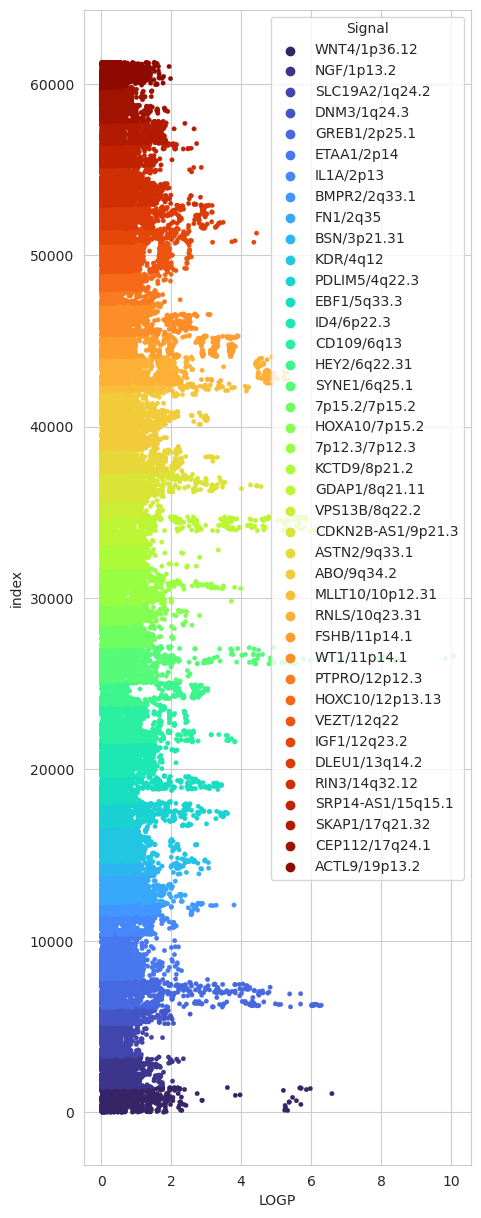

In [38]:
plt.gcf().set_size_inches(5, 15)
sns.scatterplot(data=df.reset_index(), y='index', x='LOGP', hue='Signal',
                palette='turbo', edgecolor=None, s=10)
plt.show()

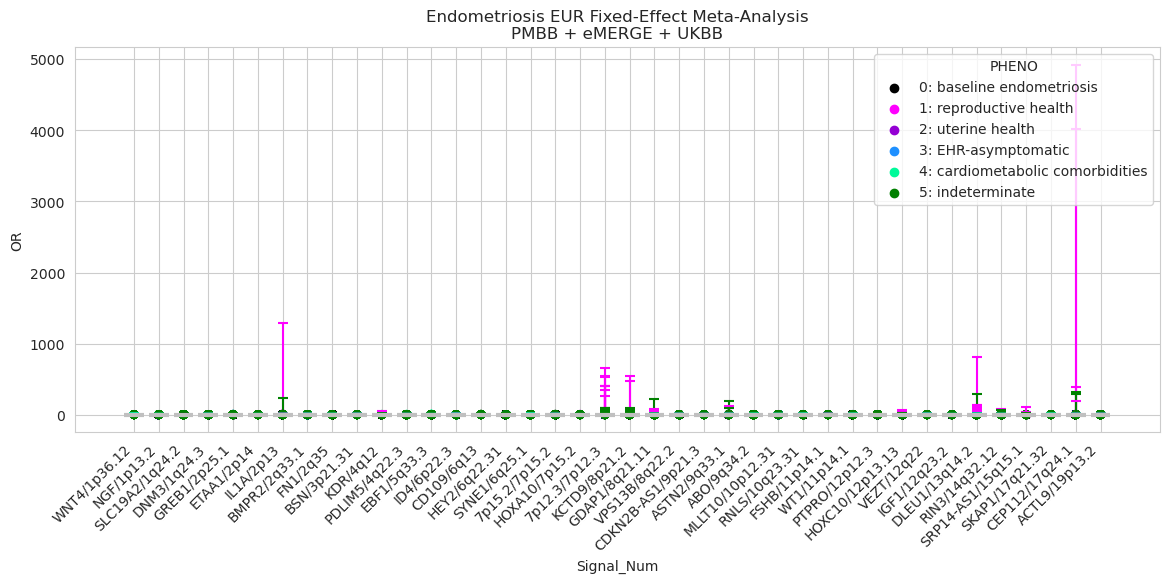

In [39]:
os.makedirs('Plots', exist_ok=True)

pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

plot_df = df.copy()
plot_df = plot_df[plot_df['I'] <= 50]
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

fig, ax = plt.subplots()
fig.set_size_inches(14, 5)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')

pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
ax.vlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.hlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.hlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

sns.scatterplot(data=plot_df, x='Signal_Num', y='OR', hue='PHENO',
                palette=colors2, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.hlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_xticks(list(signal_num.values()))
ax.set_xticklabels(list(signal_num.keys()), rotation=45, ha='right')
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
plt.savefig(f'Plots/{meta_group}_FE_endo_manhattan.png', bbox_inches='tight')
plt.show()

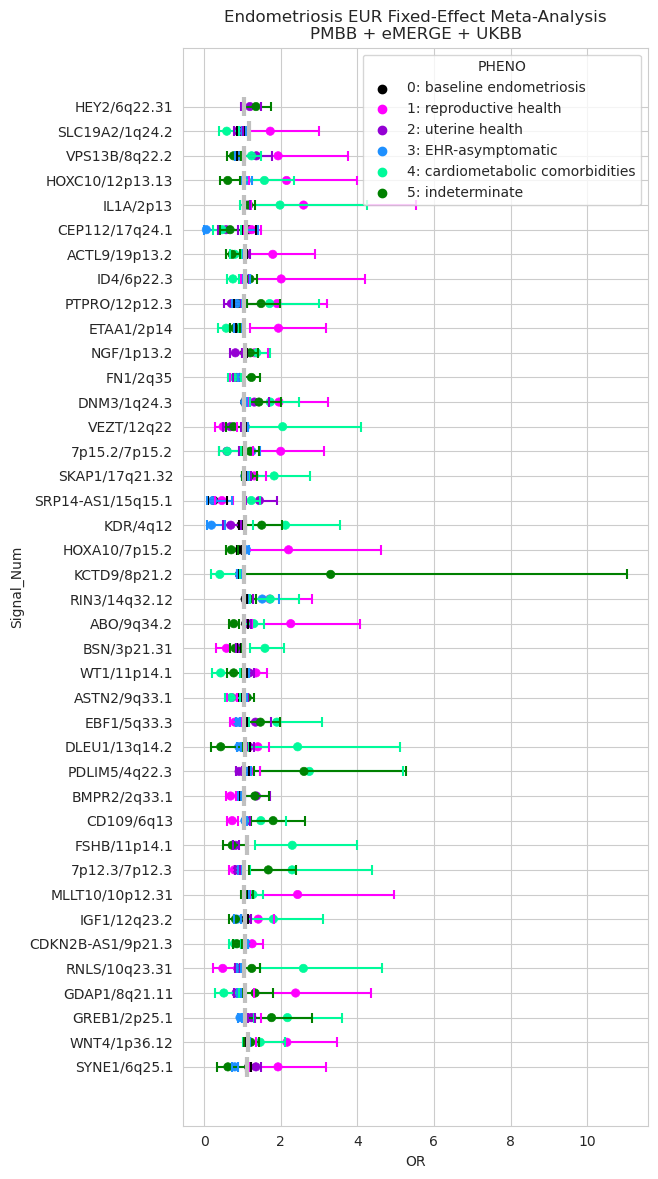

In [40]:
os.makedirs('Plots', exist_ok=True)

pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

plot_df = df.copy()
plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

# keep_signals = plot_df[plot_df['P'] <= (0.05 / 49)]['Signal'].unique()
# plot_df = plot_df[plot_df['Signal'].isin(keep_signals)]
# plot_df = plot_df[plot_df['P'] <= (0.05 / 49)]
plot_df = plot_df[plot_df['I'] <= 50]
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

fig, ax = plt.subplots()
fig.set_size_inches(6, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')

pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

sns.scatterplot(data=plot_df, y='Signal_Num', x='OR', hue='PHENO',
                palette=colors2, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
plt.savefig(f'Plots/{meta_group}_FE_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

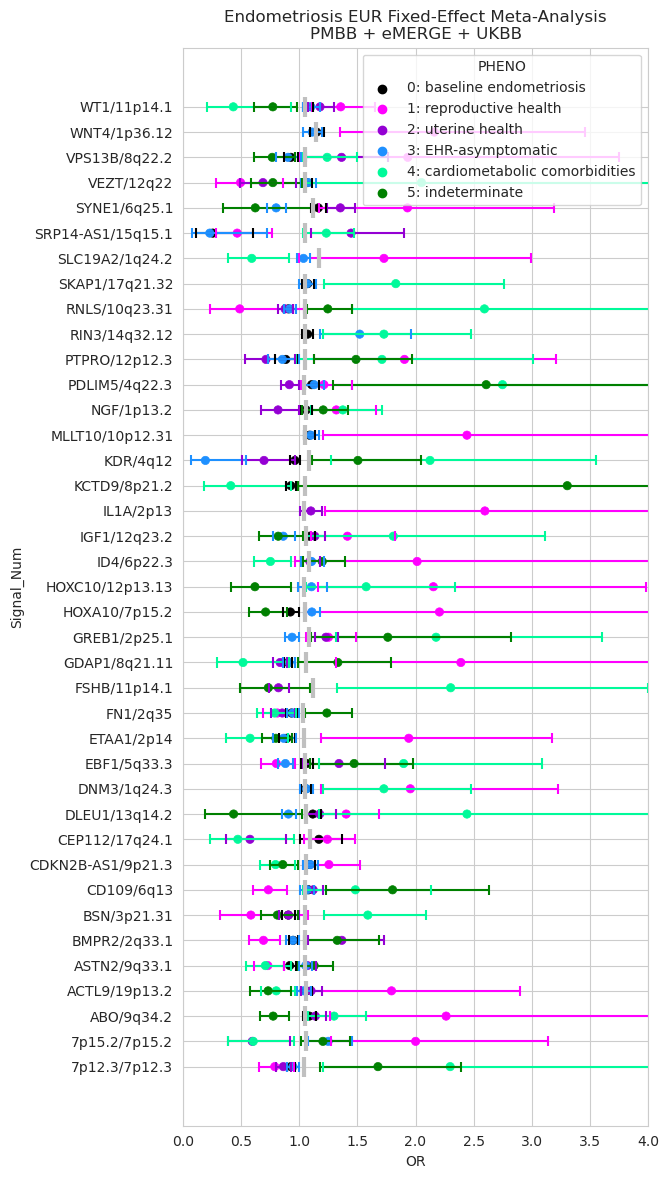

In [41]:
keep_dfs = []

for signal, subDF in plot_df.groupby('Signal'):
    M = len(subDF)
    lower_2D_1 = np.broadcast_to(subDF['CI_OR_L'], (M,M))
    lower_2D_2 = np.broadcast_to(subDF['CI_OR_L'], (M,M)).T
    upper_2D_1 = np.broadcast_to(subDF['CI_OR_U'], (M,M))
    upper_2D_2 = np.broadcast_to(subDF['CI_OR_U'], (M,M)).T

    overlap = ((lower_2D_1 <= upper_2D_2) & (upper_2D_1 >= upper_2D_2)) | \
              ((lower_2D_1 <= upper_2D_1) & (upper_2D_1 >= upper_2D_1))

    disjoint = ((lower_2D_1 > upper_2D_2) & (upper_2D_1 > upper_2D_2)) | \
               ((lower_2D_1 < lower_2D_2) & (upper_2D_1 < lower_2D_2))

    disjoint = pd.DataFrame(disjoint | disjoint.T, index=subDF['PHENO'], columns=subDF['PHENO'])

    if np.any(disjoint):
        keep_phenos = disjoint.index[disjoint.apply(lambda x: np.any(x), axis=1)]
        keep_dfs.append(subDF[subDF['PHENO'].isin(keep_phenos)])

plot_df = pd.concat(keep_dfs)


fig, ax = plt.subplots()
fig.set_size_inches(6, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')

pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

sns.scatterplot(data=plot_df, y='Signal_Num', x='OR', hue='PHENO',
                palette=colors2, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_xlim(0, 4)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
plt.savefig(f'Plots/{meta_group}_FE_disjoint_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

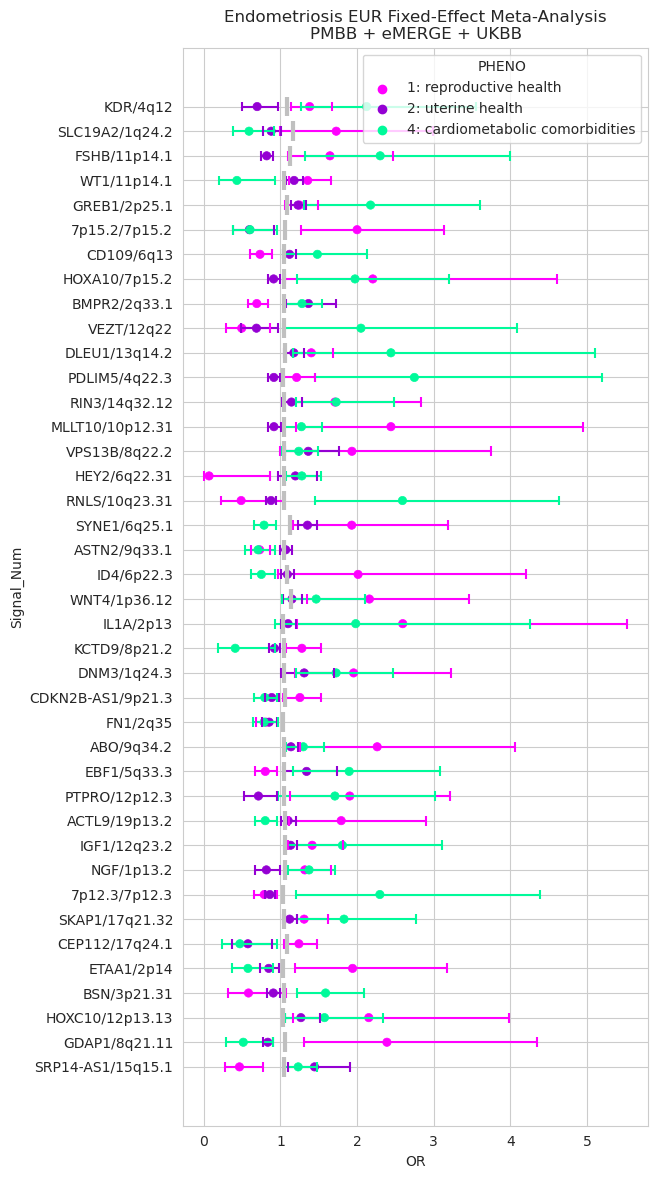

In [42]:
os.makedirs('Plots', exist_ok=True)

pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

plot_df = df.copy()
plot_df = plot_df[plot_df['I'] <= 50]
plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))
plot_df = plot_df[plot_df['PHENO'].isin(['1: reproductive health', '2: uterine health', '4: cardiometabolic comorbidities'])]

fig, ax = plt.subplots()
fig.set_size_inches(6, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap2(pheno_i[p]) for p in plot_df['PHENO']])

colors3 = []
colors3.append(colors2[1])
colors3.append(colors2[2])
colors3.append(colors2[4])

sns.scatterplot(data=plot_df, y='Signal_Num', x='OR', hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} Fixed-Effect Meta-Analysis\nPMBB + eMERGE + UKBB')
plt.savefig(f'Plots/{meta_group}_FE_endo_manhattan_T_3_clusters.png', bbox_inches='tight')
plt.show()